In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
 ## Step 1: Load and Preprocess Data
# Define transformations for images
transform = transforms.Compose([
    transforms.ToTensor(),          # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize images
])

In [ ]:
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)

In [4]:
# Get the shape of the first image in the training dataset
image, label = train_dataset[0]
print(image.shape)
print(len(train_dataset))

torch.Size([1, 28, 28])
60000


In [5]:
# Get the shape of the first image in the test dataset
image, label = test_dataset[0]
print(image.shape)
print(len(test_dataset))

torch.Size([1, 28, 28])
10000


In [6]:
# Create DataLoader for batch processing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [7]:
class CNNClassifier(nn.Module):
  def __init__(self):
    super(CNNClassifier, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
    self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.fc1 = nn.Linear(128 * 3 * 3, 128) # Adjusted input features for fc1
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, x):
    x = self.pool(torch.relu(self.conv1(x)))
    x = self.pool(torch.relu(self.conv2(x)))
    x = self.pool(torch.relu(self.conv3(x)))
    x = x.view(x.size(0), -1) # Flatten the image
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [9]:
from torchsummary import summary

model = CNNClassifier()

if torch.cuda.is_available():
    device = torch.device("cuda")
    model.to(device)

print('Name:BALASUBRAMANIAM L ')
print('Register Number:212224240020')
summary(model, input_size=(1, 28, 28))

Name:BALASUBRAMANIAM L 
Register Number:212224240020
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
            Conv2d-3           [-1, 64, 14, 14]          18,496
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Conv2d-5            [-1, 128, 7, 7]          73,856
         MaxPool2d-6            [-1, 128, 3, 3]               0
            Linear-7                  [-1, 128]         147,584
            Linear-8                   [-1, 64]           8,256
            Linear-9                   [-1, 10]             650
Total params: 249,162
Trainable params: 249,162
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.42
Params size (MB): 0.95
Estimated Total Size (

In [10]:
model =CNNClassifier()
criterion =nn.CrossEntropyLoss()
optimizer =optim.Adam(model.parameters(),lr=0.001)

In [11]:
def train_model(model, train_loader, num_epochs=3):
  for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print('Name:BALASUBRAMANIAM L ')
        print('Register Number:212224240020')
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')


In [12]:
train_model(model, train_loader)

Name:BALASUBRAMANIAM L 
Register Number:212224240020
Epoch [1/3], Loss: 0.1550
Name:BALASUBRAMANIAM L 
Register Number:212224240020
Epoch [2/3], Loss: 0.0460
Name:BALASUBRAMANIAM L 
Register Number:212224240020
Epoch [3/3], Loss: 0.0341


In [13]:
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct / total
    print('Name:BALASUBRAMANIAM L ')
    print('Register Number:212224240020')
    print(f'Test Accuracy: {accuracy:.4f}')

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    print('Name:BALASUBRAMANIAM L ')
    print('Register Number:212224240020')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Print classification report
    print('Name:BALASUBRAMANIAM L ')
    print('Register Number:212224240020')
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=test_dataset.classes))


Name:BALASUBRAMANIAM L 
Register Number:212224240020
Test Accuracy: 0.9920
Name:BALASUBRAMANIAM L 
Register Number:212224240020


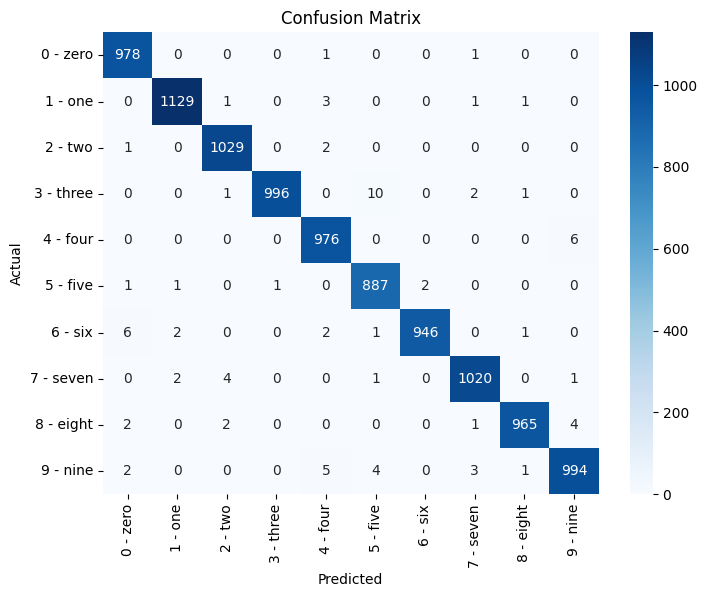

Name:BALASUBRAMANIAM L 
Register Number:212224240020
Classification Report:
              precision    recall  f1-score   support

    0 - zero       0.99      1.00      0.99       980
     1 - one       1.00      0.99      1.00      1135
     2 - two       0.99      1.00      0.99      1032
   3 - three       1.00      0.99      0.99      1010
    4 - four       0.99      0.99      0.99       982
    5 - five       0.98      0.99      0.99       892
     6 - six       1.00      0.99      0.99       958
   7 - seven       0.99      0.99      0.99      1028
   8 - eight       1.00      0.99      0.99       974
    9 - nine       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [14]:
test_model(model, test_loader)

In [15]:
import matplotlib.pyplot as plt
def predict_image(model, image_index, dataset):
    model.eval()
    image, label = dataset[image_index]
    with torch.no_grad():
        output = model(image.unsqueeze(0))  # Add batch dimension
        _, predicted = torch.max(output, 1)
    class_names = dataset.classes

    # Display the image
    print('Name:BALASUBRAMANIAM L ')
    print('Register Number:212224240020')
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(f'Actual: {class_names[label]}\nPredicted: {class_names[predicted.item()]}')
    plt.axis("off")
    plt.show()
    print(f'Actual: {class_names[label]}, Predicted: {class_names[predicted.item()]}')

Name:BALASUBRAMANIAM L 
Register Number:212224240020


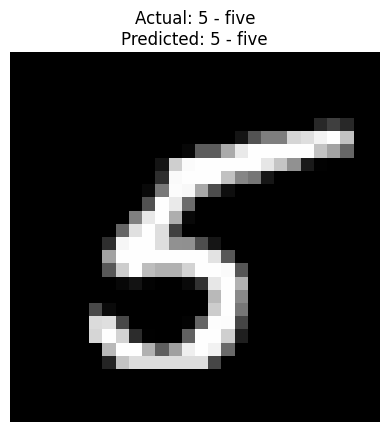

Actual: 5 - five, Predicted: 5 - five


In [16]:
predict_image(model, image_index=6500, dataset=test_dataset)